# Importing raster from Postgres DB into Python environment as Numpy array

<font size="4">Calculation of the NDVI or other indeces could be tough in the PostGIS, therefore it could be useful if we can import raster data from DB into Python as numpy array and themn try to calculate the NDVI. For more info use the article [How To Compute Satellite Image Statistics And use It In Pandas](https://towardsdatascience.com/how-to-compute-satellite-image-statistics-and-use-it-in-pandas-81864a489144) by Abdishakur</font>

In [116]:
import psycopg2
import rasterio as rs
from rasterio.io import MemoryFile
from rasterio.plot import show
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from getpass import getpass

In [90]:
password = getpass()

 ············


In [195]:
conn = psycopg2.connect("dbname='***' user='***' host='****' password='%s'" % (password))

In [196]:
cur = conn.cursor()

### Extract the image in GeoTiff format
<font size="4">The image should be extract from the DB in the format wchich is readable to the <font color='red'>**Rasterio** pkg</font>. <font color='orange'>GeoTiff </font> is a suatable format for this purpose</font>

In [197]:
# ensure that the GTiff driver is available, 
# see https://postgis.net/docs/postgis_gdal_enabled_drivers.html
cur.execute('''
  SET postgis.gdal_enabled_drivers TO 'GTiff';
  SELECT ST_AsGDALRaster(rast, 'GTiff') FROM climate.mescan_surfex_nordics_tp;
 ''')

<font size="4">In this step, constructs Python bytes showing a copy of the raw contents of data memory.</font>

In [198]:
for row in cur:
    rast = row[0].tobytes()

### Reading Datasets from the momery
<font size="4">Raster data files and are obtained by calling `rasterio.open()`

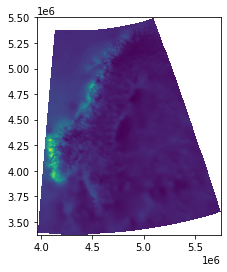

EPSG:3035


In [199]:
data = MemoryFile(rast).open()
show(data)
#pyplot.imshow(data.read(1), cmap='pink')
#print(data.profile)
#print(data.name)
print(data.crs)
data.close()

<font size="4" color="orange">Rasterio datasets can manage the entry into and exit from runtime contexts created using a `with` statement. This ensures that files are closed no matter what exceptions may be raised within the the block.</font>



In [200]:
with MemoryFile(rast).open() as dataset:
    data_array = dataset.read() # Convert to numpy array
#print(data_array)
data_array.shape

(12, 431, 365)